In [1]:
##Notebook to create plots of sea level pressure for low sic, el nino (central and eastern), and combination
##Created by Kendra Herweck
##06/07/2021

In [2]:


import netCDF4 as nc
import numpy as np
import datetime as dt  # Python standard library datetime  module
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
from pandas import read_csv
from matplotlib.dates import DateFormatter
from pandas import DataFrame
from pandas import Grouper
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import xarray as xr
from glob import glob

In [6]:
#Average climatology (1980-2020)
filename_list=[]
for i in range(1980,2021):
    if i < 1992:
        if i == 1980:
            file1='Data/Sea-Level-Pressure/MERRA2_100.instM_2d_asm_Nx.{}01.nc4.nc4'.format(i)
            file2='Data/Sea-Level-Pressure/MERRA2_100.instM_2d_asm_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Sea-Level-Pressure/MERRA2_100.instM_2d_asm_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Sea-Level-Pressure/MERRA2_100.instM_2d_asm_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Sea-Level-Pressure/MERRA2_100.instM_2d_asm_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Sea-Level-Pressure/MERRA2_100.instM_2d_asm_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Sea-Level-Pressure/MERRA2_100.instM_2d_asm_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Sea-Level-Pressure/MERRA2_100.instM_2d_asm_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Sea-Level-Pressure/MERRA2_200.instM_2d_asm_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Sea-Level-Pressure/MERRA2_200.instM_2d_asm_Nx.{}02.nc4.nc4'.format(i)
        else:    
            file1='Data/Sea-Level-Pressure/MERRA2_200.instM_2d_asm_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Sea-Level-Pressure/MERRA2_200.instM_2d_asm_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Sea-Level-Pressure/MERRA2_200.instM_2d_asm_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Sea-Level-Pressure/MERRA2_200.instM_2d_asm_Nx.{}02.nc4.nc4'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Sea-Level-Pressure/MERRA2_200.instM_2d_asm_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Sea-Level-Pressure/MERRA2_200.instM_2d_asm_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Sea-Level-Pressure/MERRA2_300.instM_2d_asm_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Sea-Level-Pressure/MERRA2_300.instM_2d_asm_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Sea-Level-Pressure/MERRA2_300.instM_2d_asm_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Sea-Level-Pressure/MERRA2_300.instM_2d_asm_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Sea-Level-Pressure/MERRA2_300.instM_2d_asm_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Sea-Level-Pressure/MERRA2_300.instM_2d_asm_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Sea-Level-Pressure/MERRA2_300.instM_2d_asm_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Sea-Level-Pressure/MERRA2_300.instM_2d_asm_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Sea-Level-Pressure/MERRA2_400.instM_2d_asm_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Sea-Level-Pressure/MERRA2_400.instM_2d_asm_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Sea-Level-Pressure/MERRA2_400.instM_2d_asm_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Sea-Level-Pressure/MERRA2_400.instM_2d_asm_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Sea-Level-Pressure/MERRA2_400.instM_2d_asm_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Sea-Level-Pressure/MERRA2_400.instM_2d_asm_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('Climatology_SeaLevelPressure_detrended.nc', 'w')
f.createDimension('time', None)
f.createDimension('y', len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
press = f.createVariable('SLP', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
#print(len(lat_out))
lon_out  = combined_ds.variables['lon']
#print(combined_ds['U'])
#print(combined_ds.variables['lev'])
data = []

for i in range (0, len(lat_out)):
    for j in range(0,len(lon_out)):
        mean = np.nanmean(combined_ds['SLP'][0:,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
press[:] = data_out
lats[:] = lat_out
lons[:] = lon_out
# close file to write on disk
f.close()

## CP - Clim

In [15]:
file1 = 'CPNino_SeaLevelPressure_detrended.nc'
ds1 = xr.open_mfdataset(file1)     
print(ds1)

<xarray.Dataset>
Dimensions:  (x: 576, y: 161)
Dimensions without coordinates: x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(161,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(576,), meta=np.ndarray>
    SLP      (y, x) float64 dask.array<chunksize=(161, 576), meta=np.ndarray>


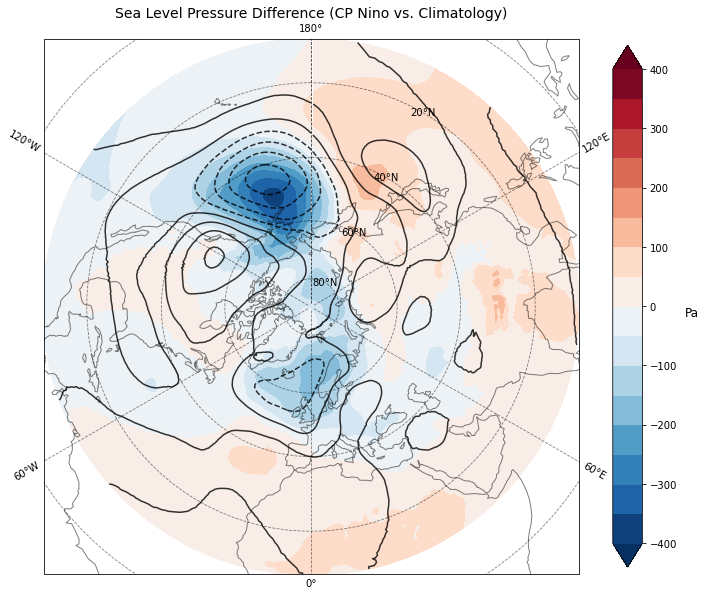

In [22]:
file1 = 'CPNino_SeaLevelPressure_detrended_1980-2020.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatology_SeaLevelPressure_detrended.nc'  ##
ds2 = xr.open_mfdataset(file2) 
file3 = 'CPYears_GeospatialHeight_detrended_1980-2020.nc'   ##CP nino
ds3 = xr.open_mfdataset(file3) 
file4 = 'Climatological_GeospatialHeight_detrended.nc'  ##climatology for geopotential height
ds4 = xr.open_mfdataset(file4)
#print(ds1)
#print(ds2)
#print(ds3)

lat = ds1.variables['lat']
lon = ds1.variables['lon']

slp1=ds1['SLP'][:,:]  ## central pacific nino
slp2=ds2['SLP'][:,:]  ## clim
slp = slp1-slp2

gpot1=ds4['H500'][:,:]  ##climatology
#print(wind1)
gpot2=ds3['H500'][:,:]  ##CP nino
gpot=gpot2-gpot1

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-400, 400, 17)
plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Sea Level Pressure Difference (CP Nino vs. Climatology)', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('Pa',size=12,rotation=0,labelpad=15)
plt.contour(lons,lats,gpot,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)
#cb2 = plt.colorbar(ax=ax,orientation = "vertical",pad=0.05,aspect=16,shrink=0.8)
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## EP - Clim

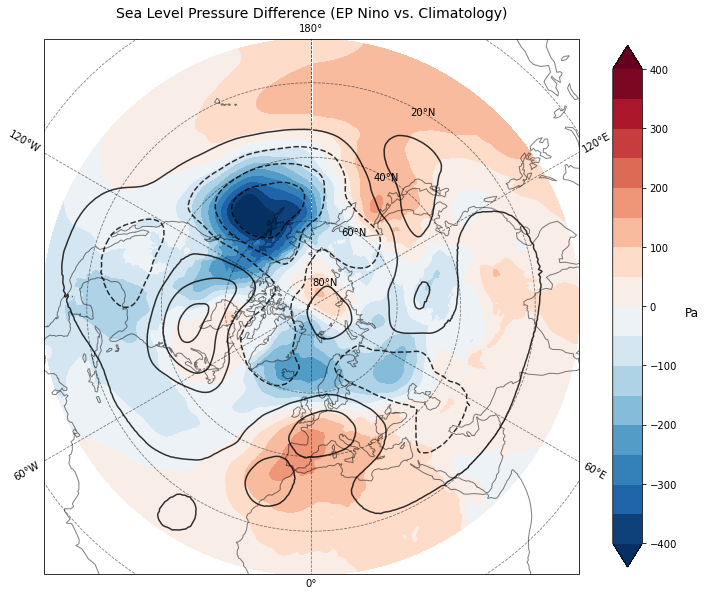

In [23]:
file1 = 'EPNino_SeaLevelPressure_detrended_1980-2020.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatology_SeaLevelPressure_detrended.nc'  ##
ds2 = xr.open_mfdataset(file2) 
file3 = 'EPYears_GeospatialHeight_detrended_1980-2020.nc'   ##EP nino
ds3 = xr.open_mfdataset(file3)
file4 = 'Climatological_GeospatialHeight_detrended.nc'  ##climatology
ds4 = xr.open_mfdataset(file4)
    


lat = ds1.variables['lat']
lon = ds1.variables['lon']

slp1=ds1['SLP'][:,:]  ## eastern pacific nino
slp2=ds2['SLP'][:,:]  ## clim
slp = slp1-slp2

gpot1=ds4['H500'][:,:]  ##climatology
#print(wind1)
gpot2=ds3['H500'][:,:]  ##EP nino
gpot=gpot2-gpot1

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-400, 400, 17)
plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Sea Level Pressure Difference (EP Nino vs. Climatology)', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('Pa',size=12,rotation=0,labelpad=15)
plt.contour(lons,lats,gpot,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)

#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## CP & Low SIC

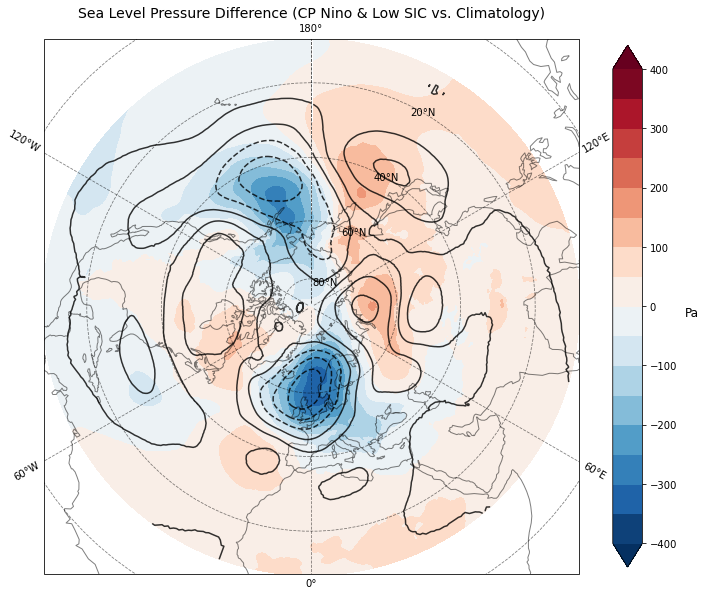

In [24]:
file1 = 'CPNino-LowSIC_SeaLevelPressure_detrended_1980-2020.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatology_SeaLevelPressure_detrended.nc'  ##
ds2 = xr.open_mfdataset(file2) 
file3 = 'LowSIC-CPYears_GeospatialHeight_detrended_1980-2020.nc'   ##CP nino & low sic
ds3 = xr.open_mfdataset(file3)
file4 = 'Climatological_GeospatialHeight_detrended.nc'  ##climatology
ds4 = xr.open_mfdataset(file4)

lat = ds1.variables['lat']
lon = ds1.variables['lon']

slp1=ds1['SLP'][:,:]  ## cp & low sic
slp2=ds2['SLP'][:,:]  ## clim
slp = slp1-slp2

gpot1=ds4['H500'][:,:]  ##climatology
#print(wind1)
gpot2=ds3['H500'][:,:]  ##CP nino & low sic
gpot=gpot2-gpot1

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-400, 400, 17)
plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Sea Level Pressure Difference (CP Nino & Low SIC vs. Climatology)', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('Pa',size=12,rotation=0,labelpad=15)
plt.contour(lons,lats,gpot,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## EP & Low SIC

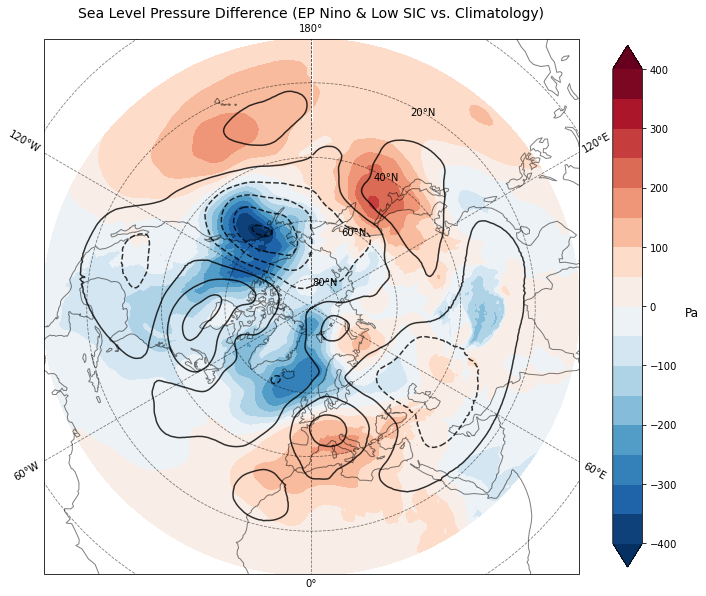

In [25]:
file1 = 'EPNino-LowSIC_SeaLevelPressure_detrended_1980-2020.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatology_SeaLevelPressure_detrended.nc'  ##
ds2 = xr.open_mfdataset(file2) 
file3 = 'LowSIC-EPYears_GeospatialHeight_detrended_1980-2020.nc'   ##EP nino & low sic
ds3 = xr.open_mfdataset(file3)
file4 = 'Climatological_GeospatialHeight_detrended.nc'  ##climatology
ds4 = xr.open_mfdataset(file4)

lat = ds1.variables['lat']
lon = ds1.variables['lon']

slp1=ds1['SLP'][:,:]  ## ep & low sic
slp2=ds2['SLP'][:,:]  ## clim
slp = slp1-slp2

gpot1=ds4['H500'][:,:]  ##climatology
#print(wind1)
gpot2=ds3['H500'][:,:]  ##EP nino & low sic
gpot=gpot2-gpot1

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-400, 400, 17)
plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, slp, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Sea Level Pressure Difference (EP Nino & Low SIC vs. Climatology)', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('Pa',size=12,rotation=0,labelpad=15)
plt.contour(lons,lats,gpot,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)